# <center>Machine learning from scratch - Day 1, Part I</center>
## <center>17 July, 2019 @ Bayer AG R&D, Berlin, Germany</center>
### <center>Marco Chierici & Margherita Francescatto</center>
#### <center>_FBK/MPBA_</center>

In this handout we will go through basic concepts of machine learning using Python and scikit-learn, first on the classic Iris dataset, then on a real-world dataset of biological relevance [Zhang et al, _Genome Biology_, 2015].

# Iris dataset starter

This initial section is meant as a starter to have a first glimpse at machine learning examples taking advantage of the Iris dataset. 

First, load required libraries:

In [1]:
import numpy as np # Python numerical library
import pandas as pd # data structures tools
from sklearn import datasets # small datasets as a playground for machine learning
import matplotlib.pyplot as plt # plotting library
%matplotlib inline

The **sklearn.datasets** package includes some small datasets that can be used for practice. One of them is the Iris Fischer dataset, introduced quickly in the first lecture. 

We can load the dataset using the datasets loader:

In [2]:
iris = datasets.load_iris()

The datasets loader returns a dictionary-like object called <i>bunch</i> holding at least two items: an <i>array</i> of shape n_samples * n_features with key <b>data</b> and a <i>numpy array</i> of length n_samples, containing the target values, with key <b>target</b>.

Let's have a first look at the data. Just type `iris`:

In [10]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In the case of the Iris dataset, the _data_ array (`iris.data`) contains 150 samples and 4 features. These dimensions can be accessed with the shape attribute:

In [11]:
iris.data.shape

(150, 4)

A more intuitive way of dealing with datasets of this type are **pandas dataframes**. In the code below, we convert the Iris dataset to a pandas dataframe and visualize its first five rows using the function **head()**.

In [16]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The _species_ columns is the target variable (the class labels) and is coded as
* 0 = Iris setosa;
* 1 = Iris versicolor;
* 2 = Iris virginica.


## Data exploration

Now we are going to actually look at the data, plotting sepal length vs petal length for the full Iris dataset. We'll use three different colors to represent the three species.

For convenience, define the colors for plotting and the species names in two separate lists:

In [18]:
colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

Then plot. I am plotting one species at a time (that's why I am looping through `i`).

Speaking about for loops, here's an example:

In [19]:
# let's loop over the species list and print its elements

for i in [0, 1, 2]:
    # mind the indentation!
    print("Current loop index: ", i)
    print("Species: ", species[i])
    print()

# the following code is outside the for loop, so we deindent it:
print("We exited the for loop :)")

Current loop index:  0
Species:  I. setosa

Current loop index:  1
Species:  I. versicolor

Current loop index:  2
Species:  I. virginica

We exited the for loop :)


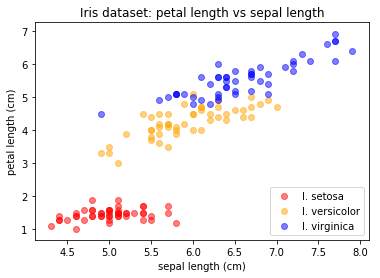

In [24]:
for i in range(3):
    # extract the samples of class i
    species_df = iris_df[ iris_df['species'] == i ]
    # plot petal (y axis) vs sepal (x axis) length
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5, # point transparency to better visualize overlaps
        label=species[i]   
    )

# add axis labels, title and legend
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')
# finally, display the plot
plt.show()

Now you should plot all the possible combinations to get an idea of feature relationships.

As we will see, there are multiple ways to accomplish this task. For now, we go the hard way and plot some combinations by hand. 

Here's sepal width vs sepal length:

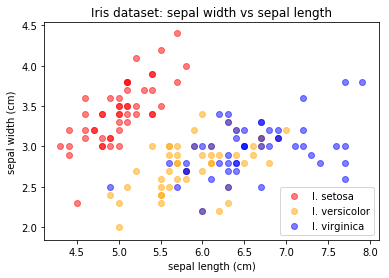

In [25]:
for i in range(3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['sepal width (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal width vs sepal length')
plt.legend(loc='lower right')

plt.show()

_What can you infer about the relationship between these features and the target variable?_

_Try plotting some other combinations._

In [ ]:
### space for practicing...

###

A more convenient way to see all the combinations is to do a **scatterplot matrix**.

For example, we can achieve this through the plotting capabilities of the pandas library.

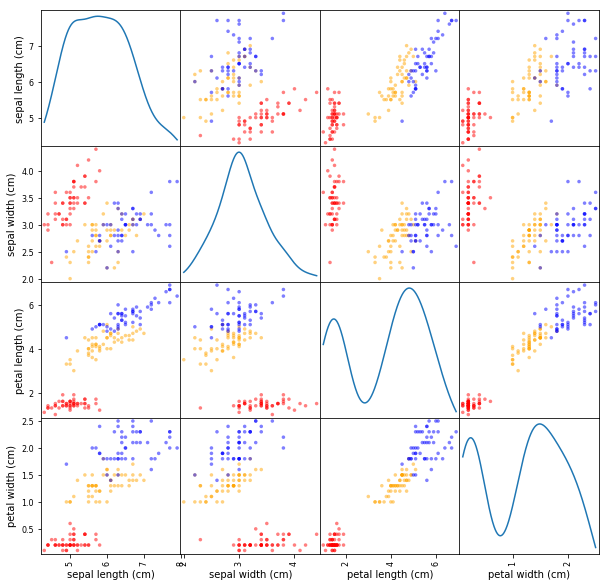

In [34]:
# let's import required stuff
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
# here we manually define a colormap (a list of colors) to color the species
cmap_rob = ListedColormap(['#FF0000','#FFA500','#0000FF'])

# for convenience, let's save the data and the labels in two objects:
# 1. we take the iris dataframe and drop the species column
X = iris_df.drop(columns="species")
# 2. now we take just the species column
y = iris_df["species"]

scatter_matrix(X, c=y, 
               figsize = [10,10], s=50, cmap = cmap_rob, diagonal = 'kde');


_What can we understand of our Iris dataset from this kind of plot?_

Just FYI, there is another option, using the `seaborn` library.

[seaborn](http://seaborn.pydata.org/) is based on matplotlib and provides a high-level interface for plotting statistical graphics that are also _attractive_ as they use enhanced color palettes.


<img src="seaborn_gallery.jpg" width="65%" />

## Iris: unsupervised learning

Let's consider again the first two columns of `iris`, sepal length and width, respectively, together with their labels (target):

In [35]:
X_iris = iris.data[:, :2]
y_iris = iris.target

_Two observations here:_ 

1. Using standard machine learning notation, we save the **data** (without the target variable) into an object named **X** and the **target** into an object named **y** (with suffixes to improve readability);
2. Since we will be using scikit-learn, which works on Numpy arrays rather than Pandas dataframes, we start from the `iris.data` and `iris.target` objects, which are Numpy arrays already.

_Side note / exercise:_

Remember that there are always multiple ways to get a desired results. For example, you may want to use your `iris_df` dataframe as starting point, converting it into a Numpy array. This can be done on any Pandas dataframe `df` by just calling the method `values`, as `df.values`. Try getting `X_iris`, `y_iris` in this way.

In [ ]:
### space for practicing...


Make a plot to visualize how the data looks like (back to matplotlib now):

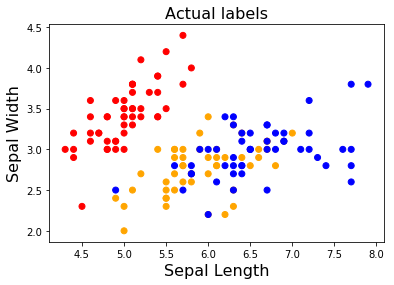

In [36]:
cmap_rob = ListedColormap(['#FF0000','#FFA500','#0000FF'])
plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=cmap_rob)
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title('Actual labels', fontsize = 16)
plt.show()

Import the required library, create a k-means **instance** and fit the model.

_Note:_ in scikit-learn, to use a model you have to first create it and assign it to a variable. This variable is called an  "instance" of the model, using object-oriented programming notation.


In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

* _Note 1:_ `km` is now a **fitted model** object, i.e., it has several **attributes** accessible using the syntax `km` + dot (.) + attribute. See the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for the list of all available attributes for KMeans objects.

* _Note 2:_ notice how I specified a random seed. This is always needed when doing computations with random numbers (e.g. initializations, random partitioning, etc.). More on this later on...

The most important attribute we are interested in right now is the `labels_` (mind the trailing underscore), which contains the cluster predictions. Save them into a new variable:

In [39]:
new_labels = km.labels_
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

_Important!_ The labels found by KMeans may be in a different order with respect to the original labels: for example, the KMeans label 1 may not be related to the original label 1. This is because KMeans finds clusters in an unsupervised way and labels them in a way determined by the algorithm.

Visually check how the clustering results compare to the original data partitioning into species.

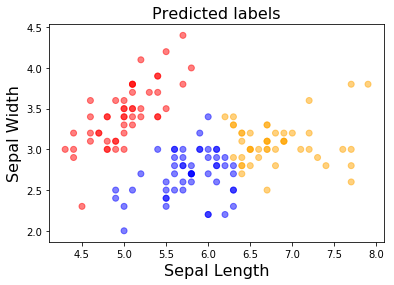

In [40]:
plt.scatter(X_iris[:,0], X_iris[:,1], c=new_labels, cmap=cmap_rob, alpha=0.5)
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title('Predicted labels', fontsize=16)
plt.show()

_Compare this plot with the previous one. What can you say about the predictions?_

Let's plot in the same figure the data with actual labels and the predicted clusters:

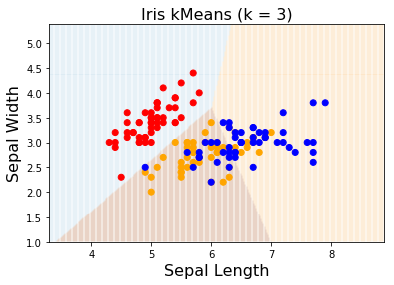

In [41]:
# define step size for the meshgrid
h = .02 
# create a color map
cmap_rob = ListedColormap(['#FF0000','#FFA500','#0000FF'])

# assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max] + something
x_min, x_max = X_iris[:,0].min() - 1, X_iris[:,0].max() + 1
y_min, y_max = X_iris[:,1].min() - 1, X_iris[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap("Paired"), alpha = 0.07)

# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=cmap_rob)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title("Iris kMeans (k = 3)", fontsize=16)
plt.show()

Choose the petal length/width pair of features. Predict the clusters using a KMeans. Plot the features and the predicted clustes on a scatter plot.

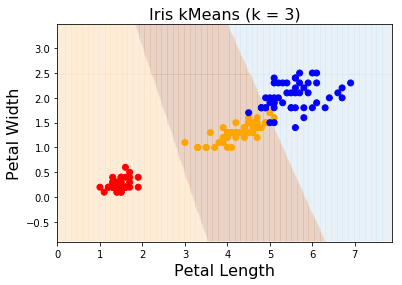

In [42]:
# prepare the data
X_iris = iris.data[:, 2:]
# redefine the target variable, just in case
y_iris = iris.target

# fit a KMeans model on data, get the predicted cluster labels
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_iris)
new_labels = km.labels_

# assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max] + something
x_min, x_max = X_iris[:,0].min() - 1, X_iris[:,0].max() + 1
y_min, y_max = X_iris[:,1].min() - 1, X_iris[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap("Paired"), alpha = 0.07)

# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=cmap_rob)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
plt.title("Iris kMeans (k = 3)", fontsize=16)
plt.show()


## Iris: supervised learning

We are going to fit a kNN model on the Iris dataset restricted to the sepal length/width feature pair.

In [43]:
# tip: although we already did this earlier, it is good practice to redefine the variables, 
# just in case something happened in-between...
X_sepal = iris.data[:, :2]
y = iris.target

Create k-NN instance (with default parameters) and fit the model. Note that default parameters imply the number of neighbors set to 5.

In [44]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_sepal, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Now we would like to plot the decision boundaries. In order to do this we need to make a <i>meshgrid</i>.

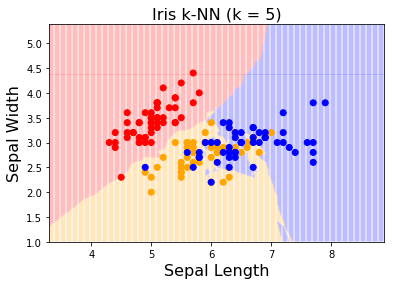

In [45]:
# define step size for the meshgrid
h = .02 
# create a color map
cmap_rob = ListedColormap(['#FF0000','#FFA500','#0000FF'])

# assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max] + something
x_min, x_max = X_sepal[:,0].min() - 1, X_sepal[:,0].max() + 1
y_min, y_max = X_sepal[:,1].min() - 1, X_sepal[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_rob, alpha = 0.07)

# Plot also the training points
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap=cmap_rob)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title("Iris k-NN (k = 5)", fontsize=16)
plt.show()

Now, I want to do this again using as features petal width and length since previous plots suggest that these features are better off at separating the data. So I fit the model again using petal data and plot decision boundaries again.

In [46]:
X_petal = iris.data[:, 2:]
knn.fit(X_petal, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

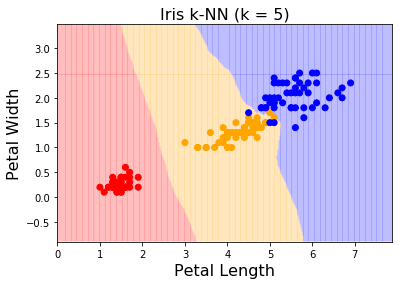

In [47]:
## then assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max]
x_min, x_max = X_petal[:,0].min() - 1, X_petal[:,0].max() + 1
y_min, y_max = X_petal[:,1].min() - 1, X_petal[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_rob, alpha = 0.07)

# Plot also the training points
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap=cmap_rob)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
plt.title("Iris k-NN (k = 5)", fontsize=16)
plt.show()